#### Import package and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy.stats import norm
warnings.simplefilter('ignore')

In [2]:
def dataset(data):
    print('Brief Data'.center(60,'-'))
    print('Dtype Info'.center(70,'~'))
    print(data.info())
    print('Brief Description data'.center(70,'~'))
    print(data.describe())
    print('Null data:')
    print(data.isnull().sum())
    print('Duplicate')
    print(data.duplicated().sum())
    print('Uniqueness:')
    print(data.nunique().sum())

In [3]:
df_train = pd.read_csv('train.csv')
dataset(df_train)

-------------------------Brief Data-------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Dtype Info~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType

In [4]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [6]:
df_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

1. SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)
16. BldgType: Type of dwelling
17. HouseStyle: Style of dwelling
18. OverallQual: Overall material and finish quality
19. OverallCond: Overall condition rating
20. YearBuilt: Original construction date
21. YearRemodAdd: Remodel date
22. RoofStyle: Type of roof
23. RoofMatl: Roof material
24. Exterior1st: Exterior covering on house
25. Exterior2nd: Exterior covering on house (if more than one material)
26. MasVnrType: Masonry veneer type
27. MasVnrArea: Masonry veneer area in square feet
28. ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30. Foundation: Type of foundation
31. BsmtQual: Height of the basement
32. BsmtCond: General condition of the basement
33. BsmtExposure: Walkout or garden level basement walls
34. BsmtFinType1: Quality of basement finished area
35. BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2: Quality of second finished area (if present)
37. BsmtFinSF2: Type 2 finished square feet
38. BsmtUnfSF: Unfinished square feet of basement area
39. TotalBsmtSF: Total square feet of basement area
40. Heating: Type of heating
41. HeatingQC: Heating quality and condition
42. CentralAir: Central air conditioning
43. Electrical: Electrical system
44. stFlrSF: First Floor square feet
45. 2ndFlrSF: Second floor square feet
46. LowQualFinSF: Low quality finished square feet (all floors)
47. GrLivArea: Above grade (ground) living area square feet
48. BsmtFullBath: Basement full bathrooms
49. BsmtHalfBath: Basement half bathrooms
50. FullBath: Full bathrooms above grade
51. HalfBath: Half baths above grade
52. Bedroom: Number of bedrooms above basement level
53. Kitchen: Number of kitchens
54. KitchenQual: Kitchen quality
55. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56. Functional: Home functionality rating
57. Fireplaces: Number of fireplaces
58. FireplaceQu: Fireplace quality
59. GarageType: Garage location
60. GarageYrBlt: Year garage was built
61. GarageFinish: Interior finish of the garage
62. GarageCars: Size of garage in car capacity
63. GarageArea: Size of garage in square feet
64. GarageQual: Garage quality
65. GarageCond: Garage condition
66. PavedDrive: Paved driveway
67. WoodDeckSF: Wood deck area in square feet
68. OpenPorchSF: Open porch area in square feet
69. EnclosedPorch: Enclosed porch area in square feet
70. 3SsnPorch: Three season porch area in square feet
71. ScreenPorch: Screen porch area in square feet
72. PoolArea: Pool area in square feet
73. PoolQC: Pool quality
74. Fence: Fence quality
75. MiscFeature: Miscellaneous feature not covered in other categories
76. MiscVal: $Value of miscellaneous feature
77.  MoSold: Month Sold
78. YrSold: Year Sold
79. SaleType: Type of sale
80. SaleCondition: Condition of sale

In [7]:
df_test = pd.read_csv('test.csv')
dataset(df_test)

-------------------------Brief Data-------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Dtype Info~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType

#### Visualization (EDA)

<Axes: xlabel='SalePrice', ylabel='Density'>

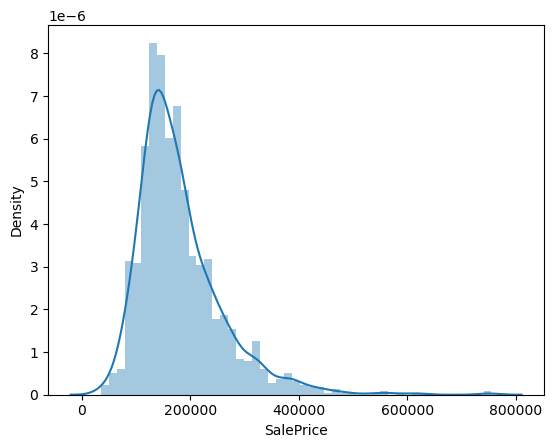

In [8]:
# Identify SalePrice in Train dataset
sns.distplot(df_train['SalePrice'], kde = True)

<Axes: >

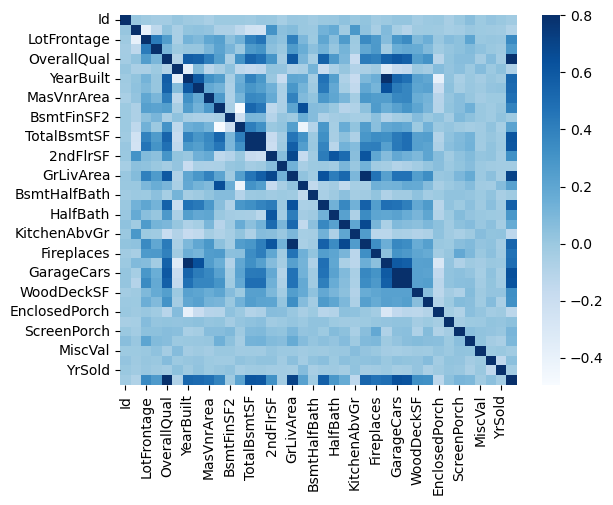

In [9]:
# correlation between SalePrice and its features
sns.heatmap(df_train.corr(),  cmap= 'Blues', vmax = .8)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

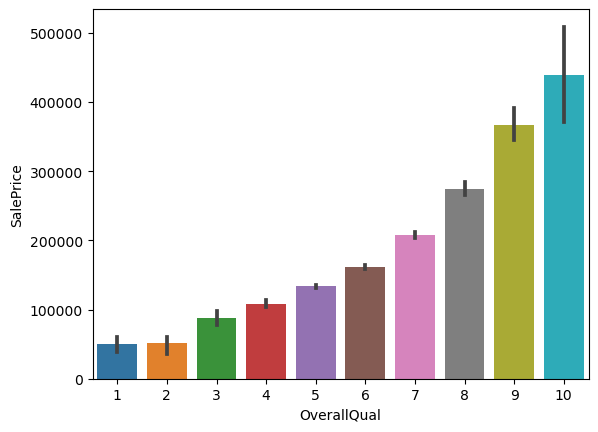

In [10]:
sns.barplot(x = df_train['OverallQual'], y = df_train['SalePrice'])

<Axes: xlabel='KitchenQual', ylabel='SalePrice'>

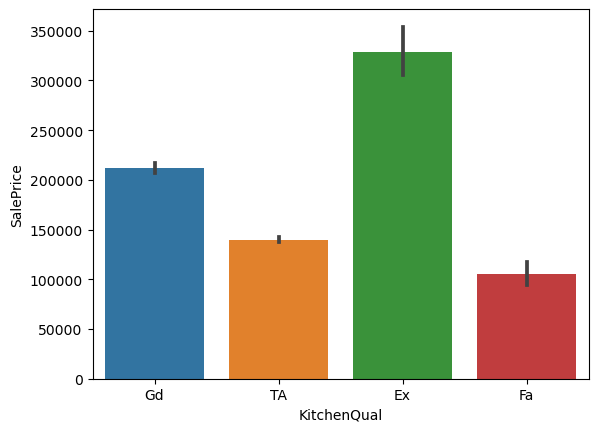

In [11]:
sns.barplot(data = df_train, x = df_train['KitchenQual'], y = df_train['SalePrice'])

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

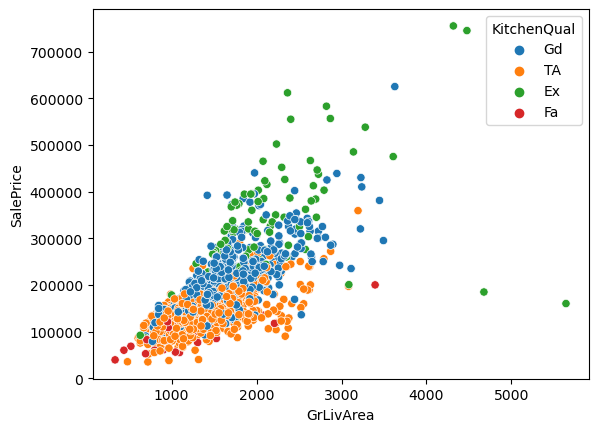

In [12]:
sns.scatterplot(x = df_train['GrLivArea'], y = df_train['SalePrice'], hue = df_train['KitchenQual'])

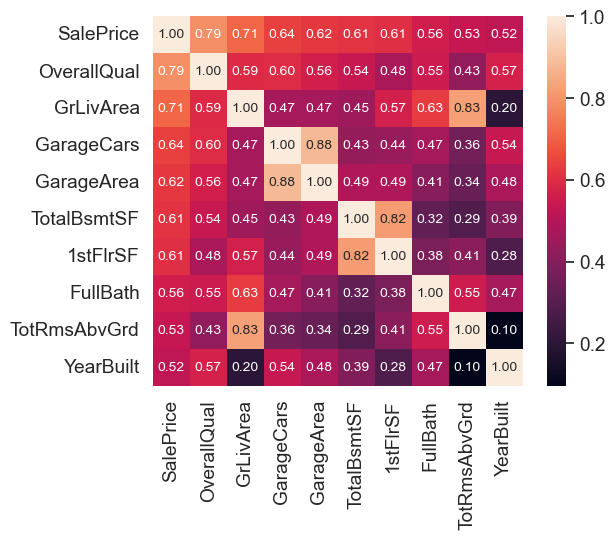

In [13]:
k = 10
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square=True, fmt = '.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

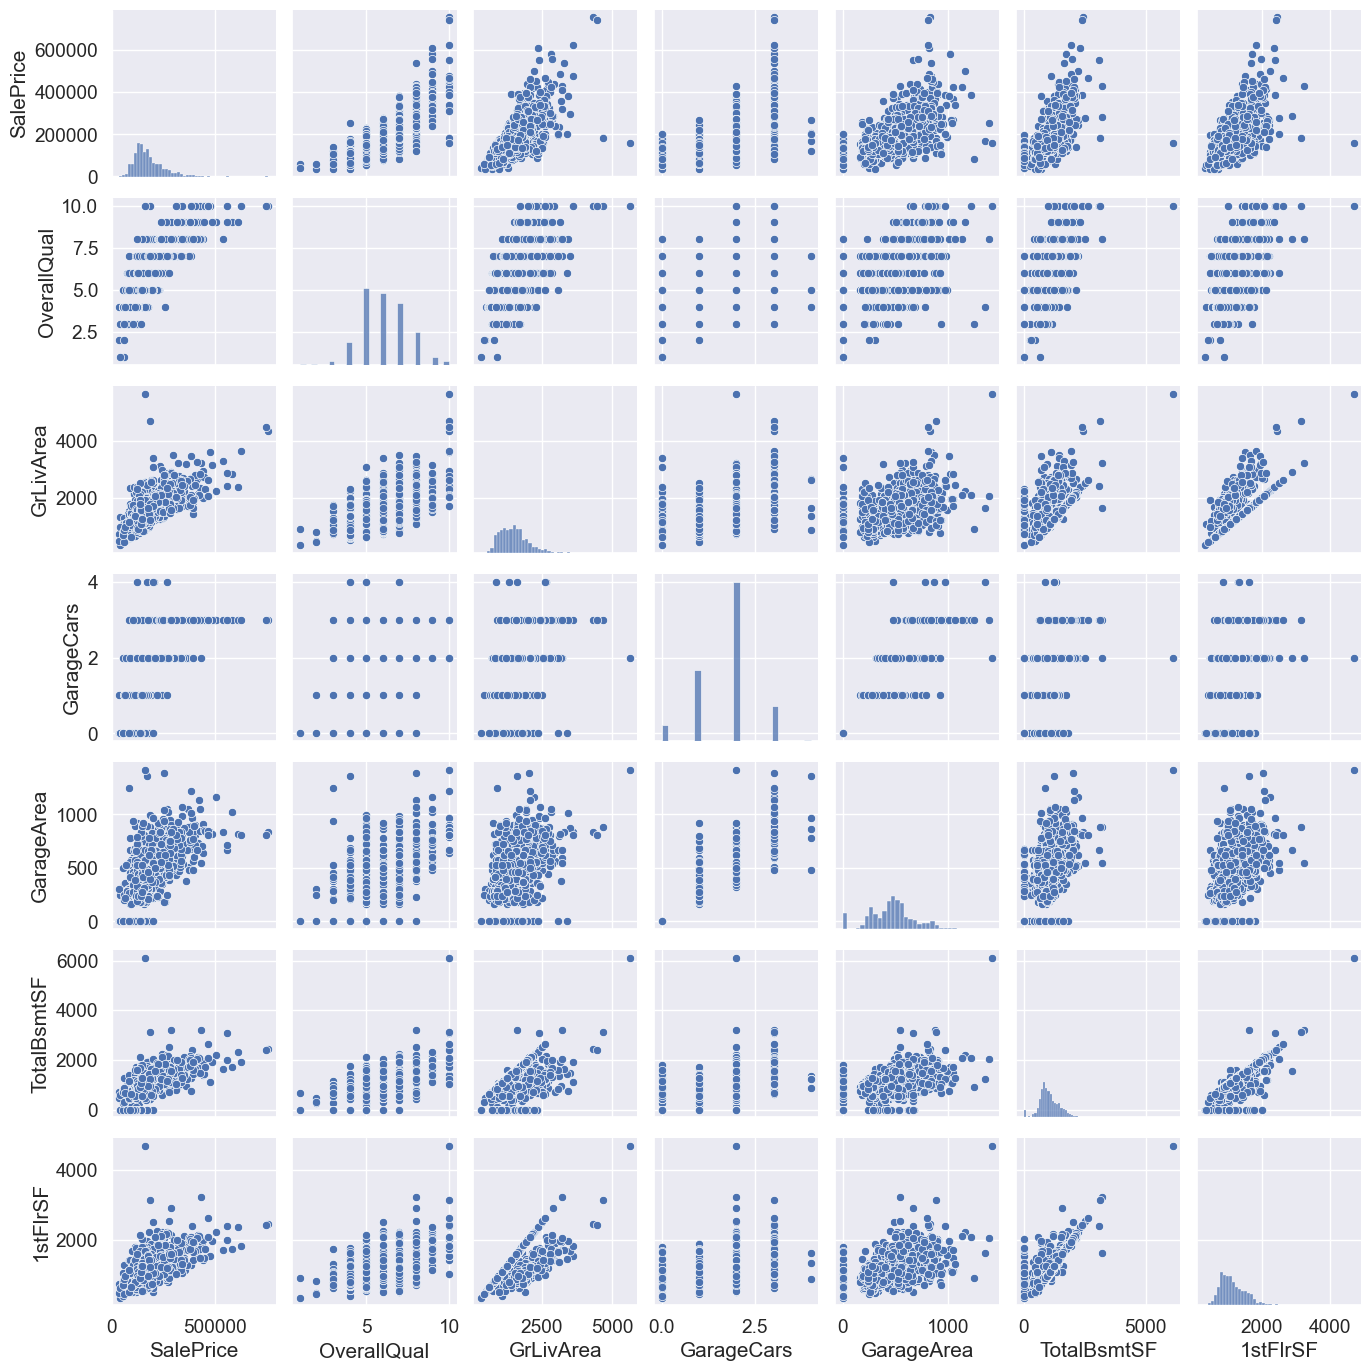

In [14]:
rec_cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF']
sns.pairplot(df_train[rec_cols], size = 2)

#### Handle Missing Value

In [15]:
# Univariat analysis for outlier

from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
saleprice_scaled = ssc.fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print ('outer range (low) of the distribution')
print(low_range)
print ('outer range (high) of the distribution')
print(high_range)

outer range (low) of the distribution
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
outer range (high) of the distribution
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

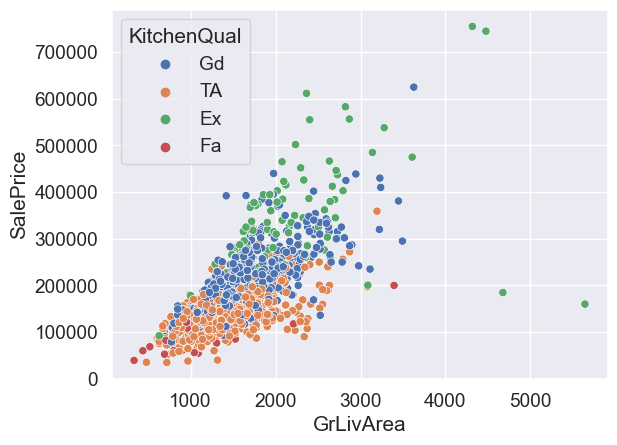

In [16]:
# bivariate analysis
sns.scatterplot(x = df_train['GrLivArea'], y = df_train['SalePrice'], hue = df_train['KitchenQual'])

In [17]:
df_train[df_train['GrLivArea'] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [18]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1298].index)
df_train = df_train.drop(df_train[df_train['Id'] == 523].index)

Text(0, 0.5, 'SalePrice')

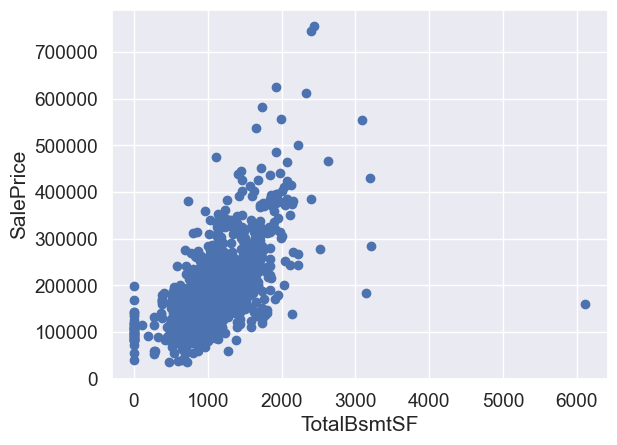

In [19]:
plt.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

# Who is 'SalePrice'?

The answer to this question lies in testing for the assumptions underlying the statistical 
bases for multivariate analysis. We already did some data cleaning and discovered
a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' 
complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al (2013), four assumptions should be tested

1. Normality (data should look like normal distribution due to several statistic tests rely on this
e.g. t-statistics)
2. Homoscedasticy (refers to 'assumption dependent variable(s) exhibit equal levels of variance 
accross the range of predictor variable(s)')
3. Linearity (refers to relationship between dependent and independent variable(s))
4. Absence of correlation errors (the error appeared when correlated to another)
"""

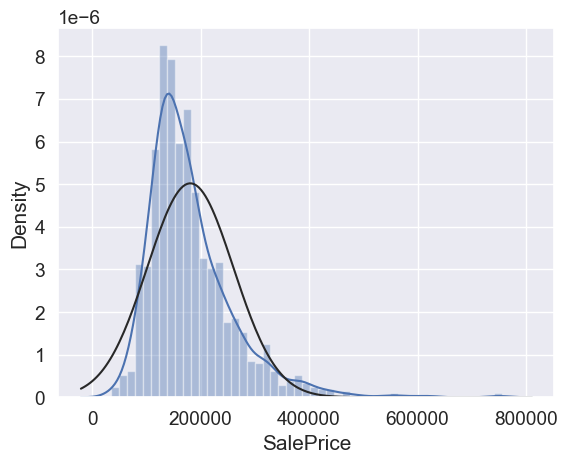

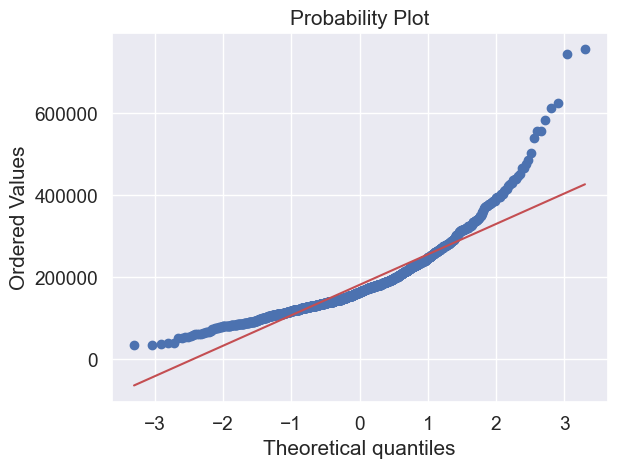

In [20]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
res =  stats.probplot (df_train['SalePrice'],  plot = plt)

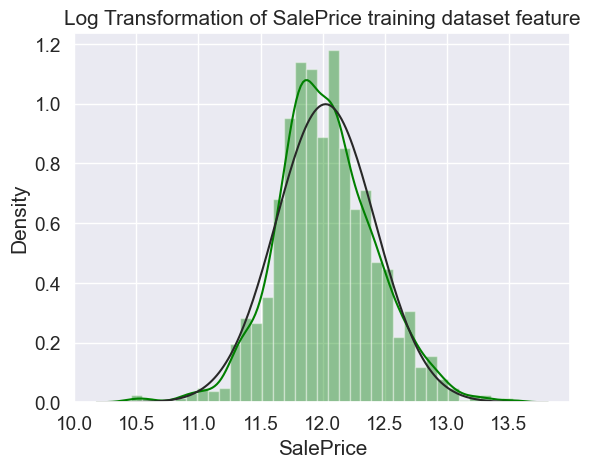

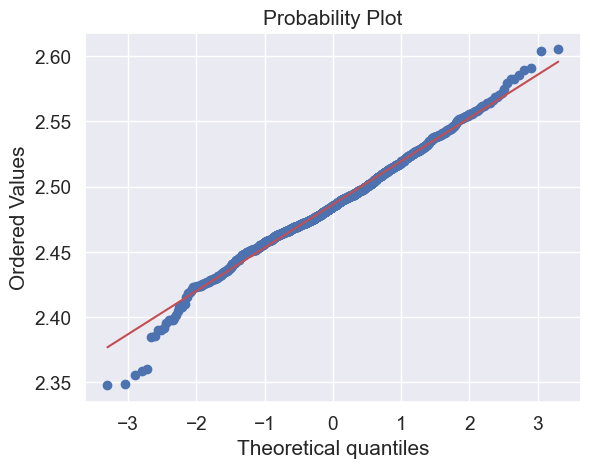

In [21]:
# after using log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit = norm, color ='green')
plt.title('Log Transformation of SalePrice training dataset feature')
fig =  plt.figure()
res = stats.probplot(np.log(df_train['SalePrice']), plot = plt)

- **GrLivArea** train data raw

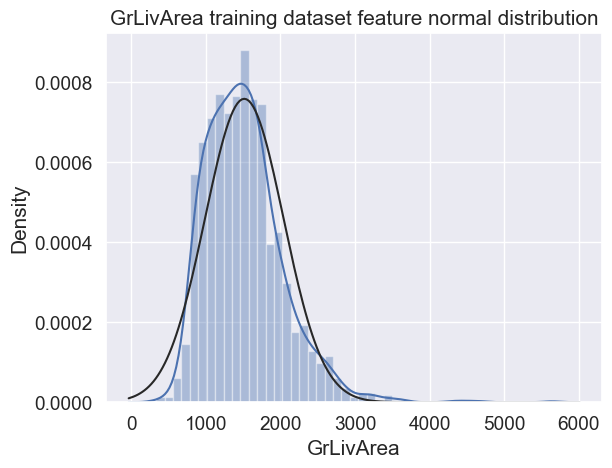

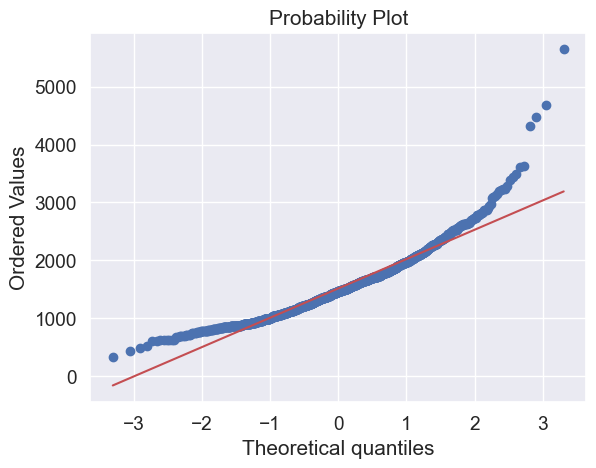

In [22]:
# GrLivArea train data
sns.distplot(df_train['GrLivArea'], fit = norm)
plt.title('GrLivArea training dataset feature normal distribution')
fig = plt.figure()
res =  stats.probplot(df_train['GrLivArea'], plot = plt)

- **GrLivArea** train dataset after _Log Transformation_

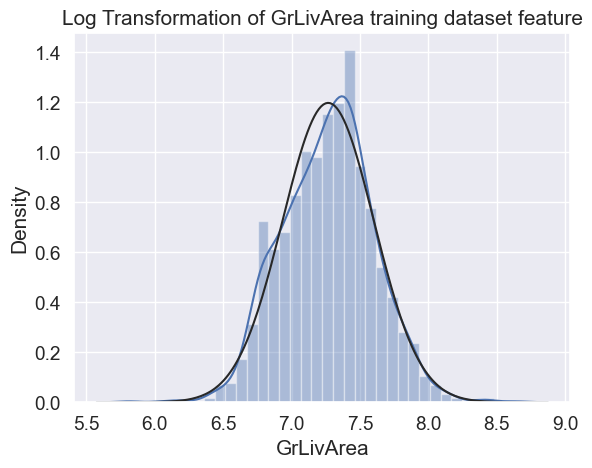

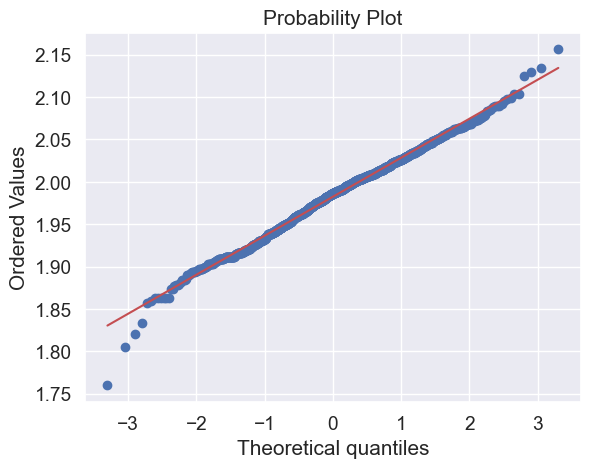

In [23]:
# after log transformation of GrLivArea train dataset
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit = norm)
plt.title('Log Transformation of GrLivArea training dataset feature')
fig = plt.figure()
res = stats.probplot(np.log(df_train['GrLivArea']),  plot = plt) 

- **GrLivArea** test dataset raw vers

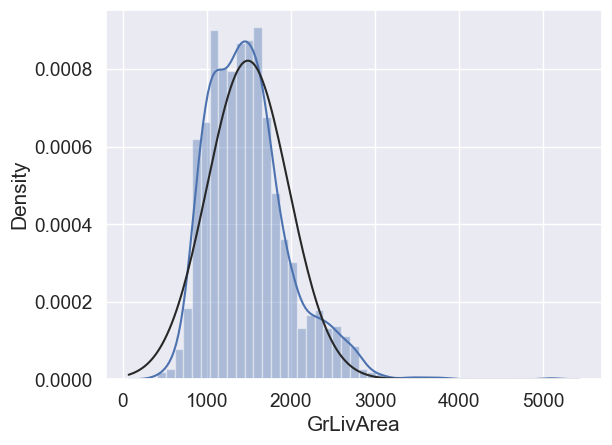

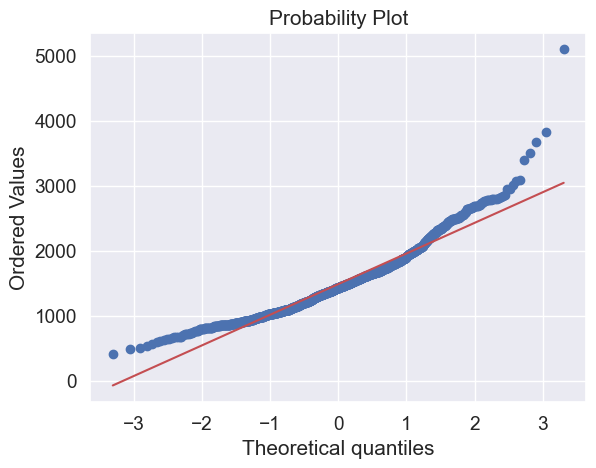

In [24]:
sns.distplot(df_test['GrLivArea'], fit = norm)
fig  =  plt.figure()
res =  stats.probplot(df_test['GrLivArea'], plot = plt)

- **GrLivArea** test dataset after _Log Transformation_.

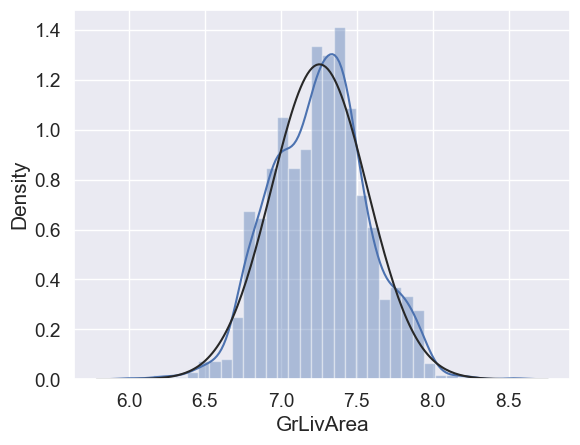

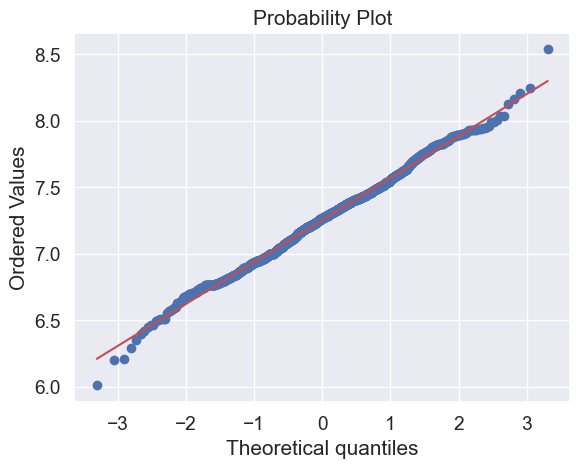

In [25]:
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])
sns.distplot(df_test['GrLivArea'], fit = norm)
fig  =  plt.figure()
res =  stats.probplot(df_test['GrLivArea'], plot = plt)

- **TotalBsmtSF** train data raw

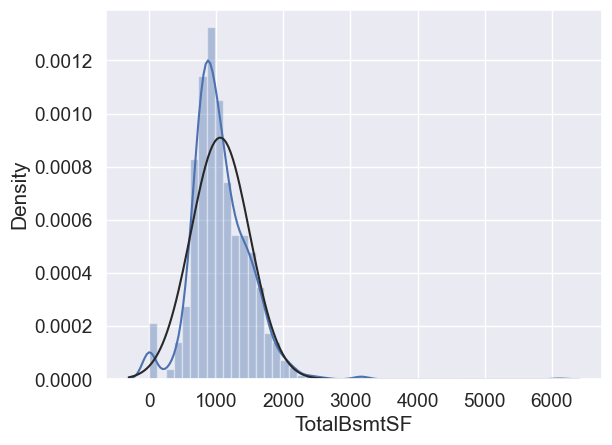

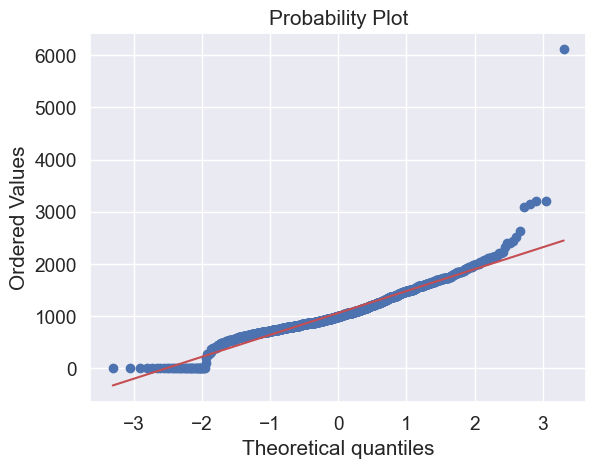

In [26]:
sns.distplot(df_train['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

problem:
1. present skewness
2. significant number of observation with 0 values (house without basement)
3. zero value doesn't allow us do transformation.

solution:
1. create binary number (1: have basement, 0: no basement)

note:
_high risk feature engineering!_

In [27]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [28]:
# transform data
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

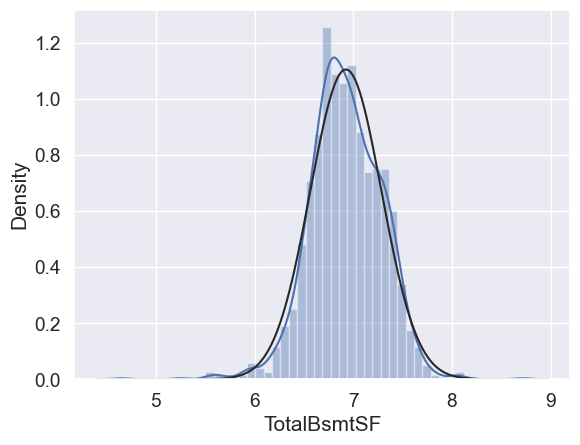

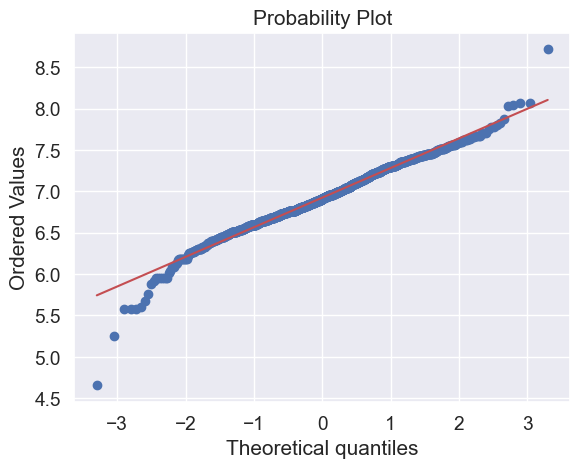

In [29]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot = plt)

- **TotalBsmtSF** test dataset raw

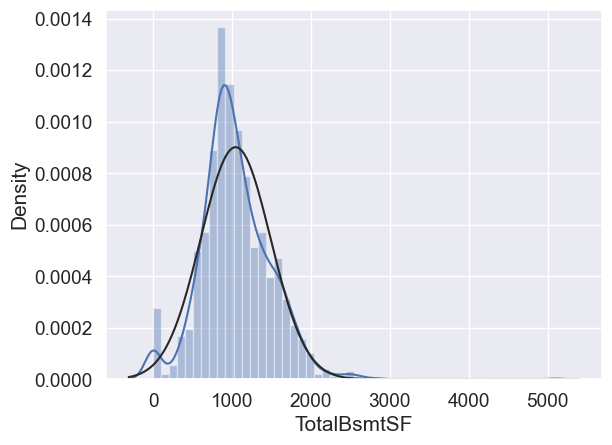

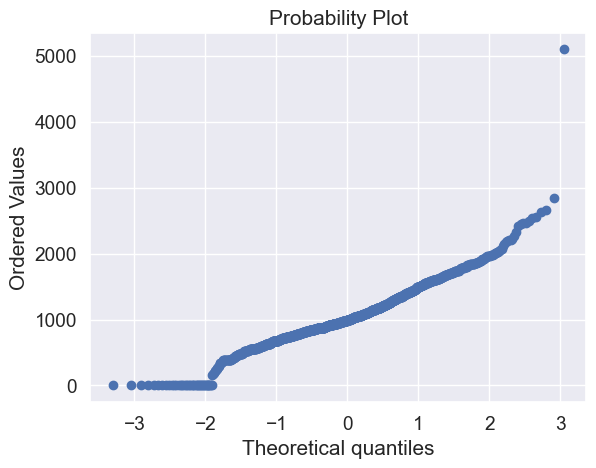

In [30]:
sns.distplot(df_test['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_test['TotalBsmtSF'], plot = plt)

In [31]:
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index = df_test.index)
df_test['HasBsmt'] = 0
df_test.loc[df_test['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [32]:
df_test.loc[df_test['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

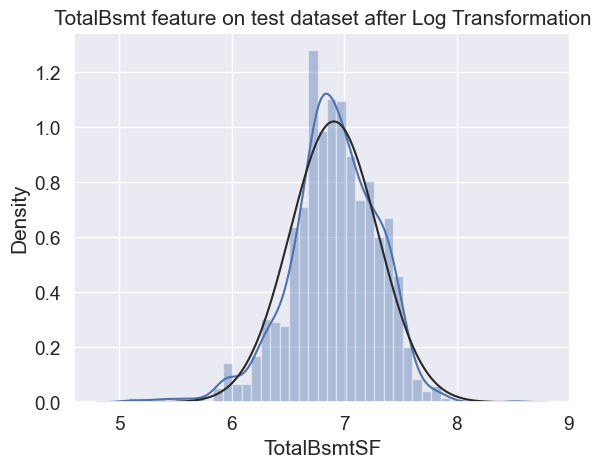

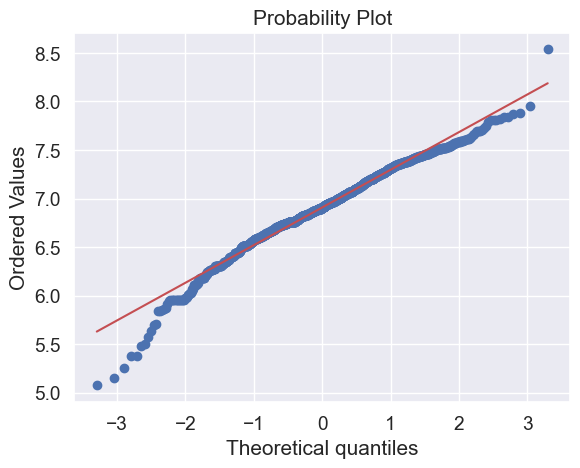

In [33]:
sns.distplot(df_test[df_test['TotalBsmtSF']>0]['TotalBsmtSF'], fit = norm)
plt.title('TotalBsmt feature on test dataset after Log Transformation')
fig = plt.figure()
res = stats.probplot(df_test[df_test['TotalBsmtSF']>0]['TotalBsmtSF'], plot = plt)

In [34]:
df_test[df_test['TotalBsmtSF']>0]['TotalBsmtSF']

0       6.782192
1       7.192182
2       6.833032
3       6.830874
4       7.154615
          ...   
1454    6.302619
1455    6.302619
1456    7.109879
1457    6.815640
1458    6.903747
Name: TotalBsmtSF, Length: 1417, dtype: float64

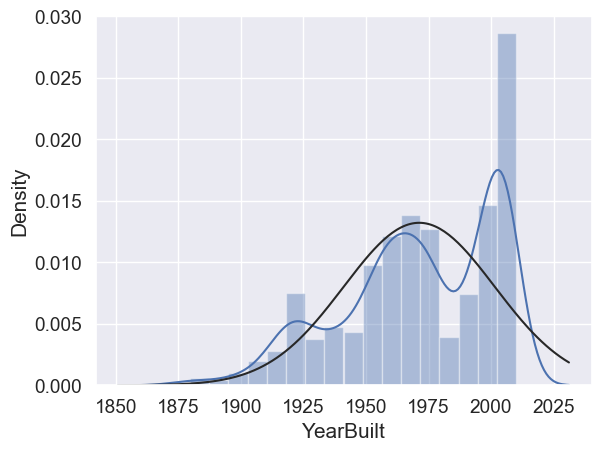

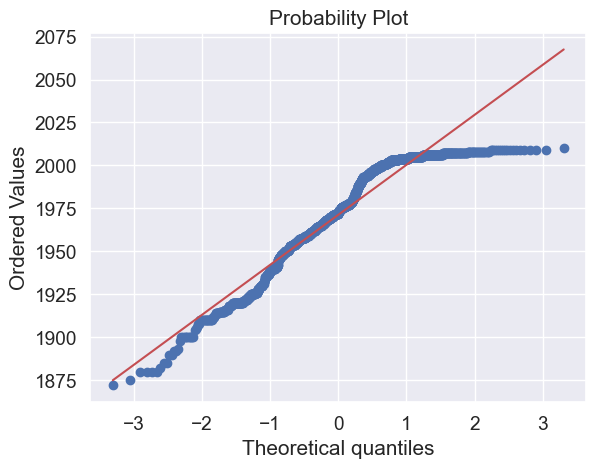

In [35]:
sns.distplot(df_train['YearBuilt'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['YearBuilt'], plot = plt)

#### Missing value imputation

- Train dataset

In [36]:
# Missing data
# 1. How prevalent is the missing data
# 2. Is missing data random or does it have a pattern?

total = df_train.isnull().sum().sort_values (ascending=False)
percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1451,99.519890
MiscFeature,1404,96.296296
Alley,1367,93.758573
Fence,1177,80.727023
FireplaceQu,689,47.256516
LotFrontage,259,17.764060
GarageType,81,5.555556
GarageYrBlt,81,5.555556
GarageCond,81,5.555556
GarageQual,81,5.555556


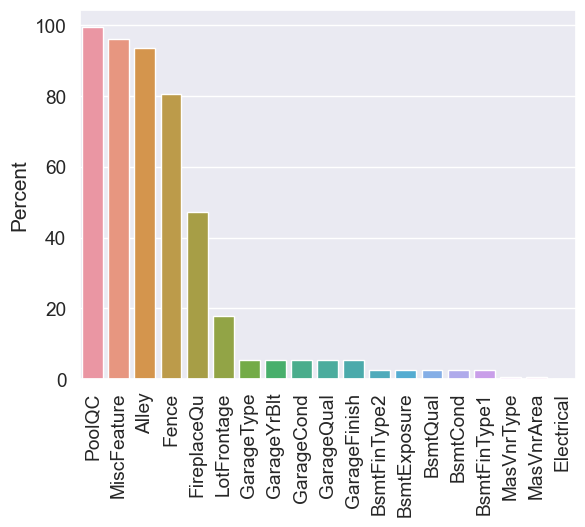

In [37]:
true_miss_data = missing_data.drop(missing_data[missing_data['Total']==0].index)
sns.barplot(data = true_miss_data, x = true_miss_data.index, y = true_miss_data.Percent)
plt.xticks(rotation = 90)
plt.show()

- Test dataset

In [38]:
test_null_total = df_test.isnull().sum().sort_values(ascending = False)
percent_null_total = (df_test.isnull().sum()*100/df_test.isnull().count()).sort_values(ascending = False)
test_data_null = pd.concat([test_null_total, percent_null_total], axis = 1, keys = ['Total','Percent'])
test_data_null.head(20)

,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageFinish,78,5.346127
GarageQual,78,5.346127
GarageCond,78,5.346127
GarageYrBlt,78,5.346127


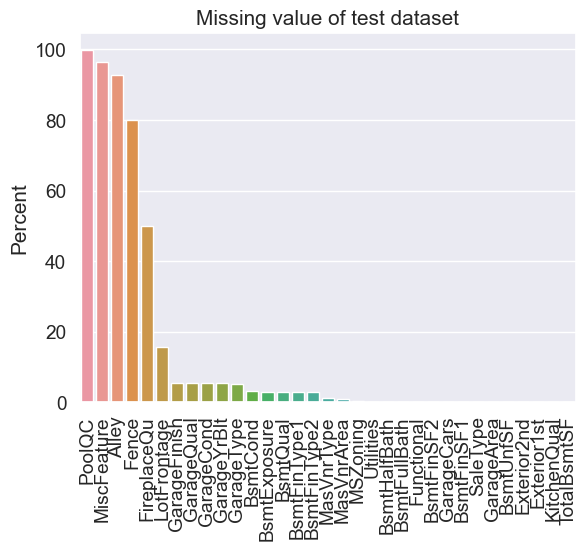

In [39]:
true_miss_data_test = test_data_null.drop(test_data_null[test_data_null['Total']==0].index)
sns.barplot(data = true_miss_data_test, y = true_miss_data_test['Percent'], x = true_miss_data_test.index)
plt.xticks(rotation = 90)
plt.title('Missing value of test dataset')
plt.show()

In [40]:
true_miss_data_test.shape

(33, 2)

From this graph, we know that:

- **PoolQC**: this feature has about 99 percent of missing value due to majority of houses have no pool both train data and test data.

In [41]:
#PoolQC
df_train.drop('PoolQC', axis = 1, inplace = True)
df_test.drop('PoolQC', axis = 1, inplace = True)

- **MiscFeature**: the second feature which have the most missing value

In [42]:
#MiscFeature
df_train.drop('MiscFeature', axis=1, inplace = True)
df_test.drop('MiscFeature', axis =1, inplace = True)

- **Alley**: Type of Alley access. This feature is dropped due to numerous null value and weak correlation of **SalePrice**

In [43]:
#Alley
df_train.drop('Alley', axis = 1, inplace = True)
df_test.drop('Alley', axis = 1, inplace = True)

- **FirePlaceQu**: FirePlace Quality

In [44]:
#FireplaceQu
df_train.drop('FireplaceQu', axis = 1, inplace = True)
df_test.drop('FireplaceQu', axis = 1, inplace = True)

- **Fence**: We delete this feature too.

In [45]:
# Fence
df_train.drop('Fence', axis = 1, inplace = True)
df_test.drop('Fence', axis = 1, inplace = True)

- Columns for **GarageX** object

In [46]:
col_garagex_object = ['GarageFinish','GarageQual','GarageCond','GarageType']
for col in col_garagex_object:
    df_train[col] = df_train[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')

In [47]:
col_garagex_num = ['GarageYrBlt', 'GarageArea','GarageCars']
for col in col_garagex_num:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col] = df_test[col].fillna(df_test[col].median())

- **BsmtX** null value

In [48]:
col_bsmtx= ['BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1',
           'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

In [49]:
# Fill Nan in train dataset
for col in col_bsmtx:
    if df_train[col].dtypes != 'object':
        df_train[col] = df_train[col].fillna(df_train[col].mean())
        df_test[col] = df_test[col].fillna(df_test[col].mean())
    else:
        df_train[col] = df_train[col].fillna('None')
        df_test[col] = df_test[col].fillna('None')
#df_train[col_bsmtx_object].dtypes

In [50]:
df_train[col_bsmtx].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtCond      1458 non-null   object 
 1   BsmtQual      1458 non-null   object 
 2   BsmtExposure  1458 non-null   object 
 3   BsmtFinType1  1458 non-null   object 
 4   BsmtFinType2  1458 non-null   object 
 5   BsmtFinSF1    1458 non-null   int64  
 6   BsmtFinSF2    1458 non-null   int64  
 7   BsmtUnfSF     1458 non-null   int64  
 8   TotalBsmtSF   1458 non-null   float64
 9   BsmtFullBath  1458 non-null   int64  
 10  BsmtHalfBath  1458 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 169.0+ KB


In [51]:
total_null_train = df_train.isnull().sum().sort_values(ascending = False)
new_percent_null_train = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending = False)
df_train_new = pd.concat([total_null_train,new_percent_null_train], keys = ['Total','Percent'], axis = 1)
df_train_new.head(20)

,Total,Percent
LotFrontage,259,17.764060
MasVnrType,8,0.548697
MasVnrArea,8,0.548697
Electrical,1,0.068587
BedroomAbvGr,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000
KitchenQual,0,0.000000
KitchenAbvGr,0,0.000000


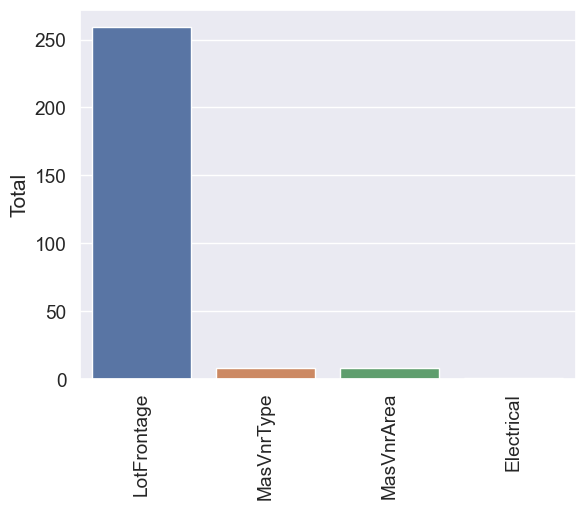

In [52]:
new_null_df_train = df_train_new.drop(df_train_new[df_train_new['Total']==0].index)
sns.barplot(new_null_df_train, x = new_null_df_train.index, y = new_null_df_train['Total'])
plt.xticks(rotation = 90)
plt.show()

In [53]:
total_null_test = df_test.isnull().sum().sort_values(ascending = False)
percent_null_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending = False)
null_df_test = pd.concat([total_null_test,percent_null_test], axis = 1, keys=['Total','Percent'])
null_df_test

,Total,Percent
LotFrontage,227,0.155586
MasVnrType,16,0.010966
MasVnrArea,15,0.010281
MSZoning,4,0.002742
Utilities,2,0.001371
...,...,...
BsmtUnfSF,0,0.000000
TotalBsmtSF,0,0.000000
MSSubClass,0,0.000000
HeatingQC,0,0.000000


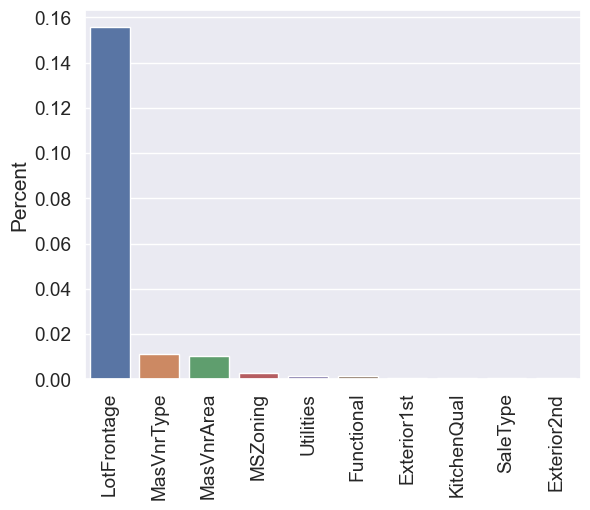

In [54]:
new_null_df_test = null_df_test.drop(null_df_test[null_df_test['Total']==0].index)
sns.barplot(data = new_null_df_test, x = new_null_df_test.index, y = new_null_df_test['Percent'])
plt.xticks(rotation = 90)
plt.show()

- The **LotFrontage** feature have NaN values, but not as much as previous feature that we deleted. We can fill in the missing value by median because each street is connected to the house property in an area.

In [55]:
#LotFrontage train data
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [56]:
# LotFrontage test data
df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

- **MasVnrX** null value not as much as the other features. So, we decided to fill it. 

In [57]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')

In [58]:
df_train[['Neighborhood','LotFrontage']]

,Neighborhood,LotFrontage
0,CollgCr,65.0
1,Veenker,80.0
2,CollgCr,68.0
3,Crawfor,60.0
4,NoRidge,84.0
...,...,...
1455,Gilbert,62.0
1456,NWAmes,85.0
1457,Crawfor,66.0
1458,NAmes,68.0


- **Electrical** feature in dataset could we fill it with mode

In [59]:
#Electrical in train dataset
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [60]:
df_train['Electrical'].value_counts()

SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

- **Exterior1st** and **Exterior2nd** features in test dataset will be fill it with mode

In [61]:
# Exterior1st and Exterior2nd
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])

In [62]:
df_test['Exterior2nd'].value_counts()

VinylSd    511
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

- **MsZoning** (Zoning Clasisification) NaN value could we fill it with most frequent value (category) of the feature.

In [63]:
#MSZoning data test feature
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])

- **Functional** feature could we fill with mode

In [64]:
#Functional test dataset feature
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])

- **Functional** feature of test dataset will be filled by mode

In [65]:
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])

- **SaleType** feature

In [66]:
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

- The last is **Utilities** feature. However, although it doesn't have much null data, this feature fills with the same value or object. So, I decided to delete this feature.

In [67]:
df_train = df_train.drop(['Utilities'], axis = 1)
df_test = df_test.drop(['Utilities'], axis = 1)

- *df_train* null data check

In [68]:
total_null_train = df_train.isnull().sum().sort_values(ascending = False)
new_percent_null_train = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending = False)
df_train_new = pd.concat([total_null_train,new_percent_null_train], keys = ['Total','Percent'], axis = 1)
df_train_new.head(10)

,Total,Percent
Id,0,0.0
HalfBath,0,0.0
GarageType,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
FullBath,0,0.0


- *df_test* null check 

In [69]:
total_null = df_test.isnull().sum().sort_values(ascending = False)
new_percent_null = (df_test.isnull().sum()*100/df_test.isnull().count()).sort_values(ascending = False)
df_null_new = pd.concat([total_null,new_percent_null], keys = ['Total','Percent'], axis = 1)
df_null_new.head(10)

,Total,Percent
Id,0,0.0
GarageYrBlt,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
FullBath,0,0.0


#### Encode the data

In [70]:
df_train[['MSSubClass','YrSold','MoSold']] = df_train[['MSSubClass','YrSold','MoSold']].astype(str)

In [71]:
df_test[['MSSubClass','YrSold','MoSold']] = df_test[['MSSubClass','YrSold','MoSold']].astype(str)

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for cols in df_train.columns:
    if df_train[cols].dtypes == 'object':
        le.fit(list(df_train[cols].values))
        df_train[cols] = le.transform(list(df_train[cols].values))
print(df_train.shape)

(1458, 76)


In [73]:
for cols in df_test.columns:
    if df_test[cols].dtypes == 'object':
        le.fit(list(df_test[cols].values))
        df_test[cols] = le.transform(list(df_test[cols].values))

print(df_test.shape)

(1459, 75)


In [74]:
# Adding feature
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_test['TotalSF']  = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

- Skewed value of the features

In [75]:
from scipy.stats import skew,kurtosis
numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness_train = pd.DataFrame({'Skew' :skewed_feats})
skewness_train.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.434913
PoolArea,14.802847
Condition2,13.149189
LotArea,12.194310
3SsnPorch,10.286510
Heating,9.838030
LowQualFinSF,8.995688
RoofMatl,8.095266
LandSlope,4.805032
KitchenAbvGr,4.480268


In [76]:
numeric_feats_test = df_test.dtypes[df_test.dtypes != 'object'].index
skewed_feats_test = df_test[numeric_feats_test].apply(lambda x: skew(x.dropna())).sort_values (ascending = False)
skewness_test = pd.DataFrame({'Skewness':skewed_feats_test})
skewness_test.head(10)

,Skewness
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
Heating,14.475300
3SsnPorch,12.511336
RoofMatl,11.929790
LandSlope,4.963280
EnclosedPorch,4.664371
KitchenAbvGr,4.074860
BsmtFinSF2,4.038570


In [77]:
df_train[['PoolArea','MiscVal', 'LowQualFinSF','EnclosedPorch']]

,PoolArea,MiscVal,LowQualFinSF,EnclosedPorch
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,272
4,0,0,0,0
...,...,...,...,...
1455,0,0,0,0
1456,0,0,0,0
1457,0,2500,0,0
1458,0,0,0,112


In [78]:
from scipy.special import boxcox1p


skewness_abs_trn = skewness_train[abs(skewness_train)>1]
print('{} skewed features changed to box cox 1p transformation'.format(skewness_abs_trn.shape[0]))
skewness_ftrs_trn = skewness_abs_trn.index
lambdax = 0.015
for skew_feat in skewness_ftrs_trn:
    df_train[skew_feat] = boxcox1p(df_train[skew_feat], lambdax)

77 skewed features changed to box cox 1p transformation


In [79]:
numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features in train dataset: \n")
skewness_train = pd.DataFrame({'Skew' :skewed_feats})
skewness_train.head(10)


Skew in numerical features in train dataset: 



,Skew
PoolArea,14.339419
Heating,7.740197
3SsnPorch,7.729316
RoofMatl,7.546100
LowQualFinSF,7.458646
MiscVal,5.180925
LandSlope,4.294339
BsmtHalfBath,3.927178
KitchenAbvGr,3.876304
ScreenPorch,3.147221


In [80]:
skewness_abs_test = skewness_test[abs(skewness_test)>1]
print('{} skewed features changed to box cox 1p transformation'.format(skewness_abs_test.shape[0]))
skewness_ftrs_test = skewness_abs_test.index
lambdax = 0.015
for skew_features in  skewness_ftrs_test:
    df_test[skew_features] = boxcox1p(df_test[skew_features], lambdax)

76 skewed features changed to box cox 1p transformation


In [81]:
numeric_feats_test = df_test.dtypes[df_test.dtypes != 'object'].index
skewed_feats_test = df_test[numeric_feats_test].apply(lambda x: skew(x.dropna())).sort_values (ascending = False)
skewness_test = pd.DataFrame({'Skewness':skewed_feats_test})
skewness_test.head(10)

,Skewness
PoolArea,15.722650
Heating,12.084543
3SsnPorch,10.539469
LowQualFinSF,10.328535
RoofMatl,10.194034
MiscVal,5.281617
LandSlope,4.645868
BsmtHalfBath,3.633938
KitchenAbvGr,3.171295
ScreenPorch,2.771004


In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   float64
 1   MSSubClass     1458 non-null   float64
 2   MSZoning       1458 non-null   float64
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   float64
 5   Street         1458 non-null   float64
 6   LotShape       1458 non-null   float64
 7   LandContour    1458 non-null   float64
 8   LotConfig      1458 non-null   float64
 9   LandSlope      1458 non-null   float64
 10  Neighborhood   1458 non-null   float64
 11  Condition1     1458 non-null   float64
 12  Condition2     1458 non-null   float64
 13  BldgType       1458 non-null   float64
 14  HouseStyle     1458 non-null   float64
 15  OverallQual    1458 non-null   float64
 16  OverallCond    1458 non-null   float64
 17  YearBuilt      1458 non-null   float64
 18  YearRemo

In [83]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   float64
 1   MSSubClass     1459 non-null   float64
 2   MSZoning       1459 non-null   float64
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   float64
 5   Street         1459 non-null   float64
 6   LotShape       1459 non-null   float64
 7   LandContour    1459 non-null   float64
 8   LotConfig      1459 non-null   float64
 9   LandSlope      1459 non-null   float64
 10  Neighborhood   1459 non-null   float64
 11  Condition1     1459 non-null   float64
 12  Condition2     1459 non-null   float64
 13  BldgType       1459 non-null   float64
 14  HouseStyle     1459 non-null   float64
 15  OverallQual    1459 non-null   float64
 16  OverallCond    1459 non-null   float64
 17  YearBuilt      1459 non-null   float64
 18  YearRemo

#### Modelling

- Import Libraries

In [84]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [85]:
#Validation function
n_folds = 8
y_train = df_train.SalePrice.values
x_train = df_train.drop(['SalePrice','Id'], axis = 1)
df_test_id = df_test['Id']
test = df_test.drop('Id', axis =1)
df_train_id = df_train['Id']
def rmsle_cv(model):
    kfold = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse = np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring='neg_mean_squared_error', cv = kfold))
    return rmse

In [86]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasBsmt,TotalSF
0,7.700794,1.816055,1.107714,4.542518,10.049786,0.696763,1.400808,1.400808,1.629022,0.000000,...,0.0,4.972499,0.0,0.000000,2.233834,1.629022,2.233834,1.629022,0.696763,7.166194
1,7.701557,1.816055,1.400808,4.555626,10.286091,0.696763,0.000000,1.400808,0.000000,0.000000,...,0.0,0.000000,0.0,10.133633,2.233834,1.629022,2.233834,1.629022,0.696763,7.601320
2,7.702319,2.441541,1.400808,4.460361,10.250193,0.696763,0.000000,1.400808,1.629022,0.000000,...,0.0,0.000000,0.0,0.000000,1.816055,1.629022,2.233834,1.629022,0.696763,7.826907
3,7.703081,2.441541,1.400808,4.515819,9.874494,0.696763,0.000000,1.400808,1.629022,0.000000,...,0.0,0.000000,0.0,0.000000,2.233834,1.629022,2.233834,1.629022,0.696763,7.809709
4,7.703842,0.000000,1.400808,3.893652,9.086554,0.696763,0.000000,0.696763,1.629022,0.000000,...,0.0,5.167203,0.0,0.000000,0.000000,1.629022,2.233834,1.629022,0.696763,7.559710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,8.474953,1.107714,1.629022,3.163822,8.015290,0.696763,1.400808,1.400808,1.629022,0.000000,...,0.0,0.000000,0.0,0.000000,2.233834,0.000000,2.233834,1.629022,0.696763,7.383408
1455,8.475340,1.107714,1.629022,3.163822,7.990736,0.696763,1.400808,1.400808,1.629022,0.000000,...,0.0,0.000000,0.0,0.000000,1.974588,0.000000,2.233834,0.000000,0.696763,7.383408
1456,8.475726,1.816055,1.400808,5.280075,10.676957,0.696763,1.400808,1.400808,1.629022,0.000000,...,0.0,0.000000,0.0,0.000000,2.531798,0.000000,2.233834,0.000000,0.696763,7.510200
1457,8.476112,2.763804,1.400808,4.274585,9.926583,0.696763,1.400808,1.400808,1.629022,0.000000,...,0.0,0.000000,0.0,6.885338,2.342811,0.000000,2.233834,1.629022,0.696763,7.253442


- **Lasso** regression: 

Sensitive to outliers. We use the sklearn's **Robustscaler()** method to make it more robust on the outlier.

In [87]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.15, random_state=4))

- ElasticNet regression:

The weakness of this model is similar to **Lasso** regeression. So, we use the same method.

In [88]:
elasticnet = make_pipeline(RobustScaler(), ElasticNet(alpha =  0.005, random_state = 1))

- **Gradient Boosting** regression:



In [89]:
grad_boost = GradientBoostingRegressor(random_state=1, n_estimators=3000, learning_rate = 0.03, max_depth=4,
                                      max_features='sqrt', min_samples_leaf=15, loss = 'huber')

- **XGBoost:**

In [90]:
xgb_mod = xgb.XGBRegressor(random_state = 2, learning_rate = 0.03, max_depth = 4)

- **Kernel Ridge Regressor**:

In [91]:
KRR = KernelRidge(alpha=0.4, kernel='polynomial', degree=4)

#### Base models scores

Model performance by using cross validation and rmse error

In [92]:
#Lasso
rmse_lasso = rmsle_cv(lasso)
print('\nLasso score: {:.5f} (std: {:5f})\n'.format(rmse_lasso.mean(), rmse_lasso.std()))


Lasso score: 0.03182 (std: 0.002116)



In [93]:
#Gradient Boost
rmse_gb = rmsle_cv(grad_boost)
print('\nGradient Boosting score: {:.5f} with std {:.5f}\n'.format(rmse_gb.mean(),rmse_gb.std()))


Gradient Boosting score: 0.00991 with std 0.00178



In [94]:
#Elastic Net
rmse_elasticnet = rmsle_cv(elasticnet)
print('\nElasticNet Regression score: {:.5f} with std {:.5f}\n'.format(rmse_elasticnet.mean(), rmse_elasticnet.std()))


ElasticNet Regression score: 0.01345 with std 0.00141



In [95]:
#XGBoost
rmse_xgb =  rmsle_cv(xgb_mod)
print('\nXGBoost Regression score: {:.5f} with std {:.5f}\n'.format(rmse_xgb.mean(), rmse_xgb.std()))


XGBoost Regression score: 0.10260 with std 0.00135



In [96]:
rmse_krr = rmsle_cv(KRR)
print('\nKernel Ridge score: {:.5f} with std {:.5f}\n'.format(rmse_krr.mean(), rmse_krr.std()))


Kernel Ridge score: 0.01680 with std 0.00215



In [97]:
class averagemodel (BaseEstimator, TransformerMixin, RegressorMixin):
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y):
        self.model_ = [clone(x) for x in self.model]
        
        for models in self.model_:
            models.fit(X,y)
            
        return self

    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.model_])
        
        return np.mean(predictions, axis = 1)

In [98]:
averaged_model = averagemodel(model = (lasso, elasticnet, KRR, xgb_mod))

score = rmsle_cv(averaged_model)
print('Averaged base model RMSE score: {:.5f} with std {:.5f}'.format(score.mean(), score.std()))

Averaged base model RMSE score: 0.02997 with std 0.00089


#### Add meta model

In [99]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

stacked_avg_model = StackingAveragedModels(base_models=(elasticnet, grad_boost, KRR), meta_model=lasso)

score = rmsle_cv(stacked_avg_model)
print('Stacking Avg Model score: {:.5f} with std is {:.5f}'.format(score.mean(), score.std()))

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#stacked avg model
stacked_avg_model.fit(x_train.values, y_train)
stacked_train_pred = stacked_avg_model.predict(x_train.values)
stacked_pred = np.expm1(stacked_avg_model.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

In [108]:
#xgboost
xgb_mod.fit(x_train, y_train)
xgb_train_pred = xgb_mod.predict(x_train)
xgb_pred = np.expm1(xgb_mod.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.10238120200400141


In [109]:
#KernelRidge
KRR.fit(x_train, y_train)
KRR_train_pred = KRR.predict(x_train)
KRR_pred = np.expm1(KRR.predict(test))
print(rmsle(y_train, KRR_train_pred))

0.0010854414068204538


In [110]:
grad_boost.fit(x_train, y_train)
grad_boost_train_pred = grad_boost.predict(x_train)
grad_boost_pred = np.expm1(grad_boost.predict(test))
print(rmsle(y_train, grad_boost_train_pred))

0.004860606424654784


In [112]:
elasticnet.fit(x_train, y_train)
elasticnet_train_pred =  elasticnet.predict(x_train)
elasticnet_pred = np.expm1(elasticnet.predict(test))
print(rmsle(y_train, elasticnet_train_pred))

0.013325771374878658


In [129]:
ensemble = grad_boost_pred*0.7 + KRR_pred*0.3

In [119]:
df_test_ = pd.read_csv('test.csv')
df_test_

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [130]:
sub =  pd.DataFrame()
sub["id"] = df_test_['Id']
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv', index = False)

In [131]:
sub

,id,SalePrice
0,1461,12.236969
1,1462,12.715450
2,1463,12.774064
3,1464,12.832967
4,1465,12.785996
...,...,...
1454,2915,11.909045
1455,2916,11.867309
1456,2917,12.621447
1457,2918,12.274685
